### Importar Librerias

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Cargar dataset

In [2]:
df = pd.read_csv('cars.csv')

df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


In [3]:
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


Limpiamos tabla, dejando unicamente los datos relevantes para el analisis

In [4]:
df = df.drop(columns=['feature_0','feature_1','feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'duration_listed'])
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7


In [5]:
df = df.drop(columns=['engine_has_gas','has_warranty','state', 'drivetrain', 'is_exchangeable', 'location_region', 'number_of_photos'])
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,price_usd,up_counter
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,gasoline,2.5,universal,10900.00,13
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,gasoline,3.0,universal,5000.00,54
2,Subaru,Forester,automatic,red,402000,2001,gasoline,gasoline,2.5,suv,2800.00,72
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,gasoline,3.0,sedan,9999.00,42
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,gasoline,2.5,universal,2134.11,7


In [6]:
df = df.dropna()
df = df.drop_duplicates()
df = df.drop(df[df['price_usd'] < 1000].index)

#### Revisamos que tipos de datos estamos trabajando

In [7]:
df.dtypes

manufacturer_name     object
model_name            object
transmission          object
color                 object
odometer_value         int64
year_produced          int64
engine_fuel           object
engine_type           object
engine_capacity      float64
body_type             object
price_usd            float64
up_counter             int64
dtype: object

#### Generamos los estadisticos descriptivos de los datos númericos

In [8]:
df.describe()

,odometer_value,year_produced,engine_capacity,price_usd,up_counter
count,34969.000000,34969.000000,34969.000000,34969.000000,34969.00000
mean,244273.947296,2004.004089,2.088746,7229.633164,16.57774
std,129561.772404,7.447625,0.687618,6433.450745,43.44678
min,0.000000,1942.000000,0.200000,1000.000000,1.00000
25%,155000.000000,1999.000000,1.600000,2800.000000,2.00000
50%,243000.000000,2004.000000,2.000000,5400.000000,5.00000
75%,320000.000000,2010.000000,2.400000,9500.000000,16.00000
max,1000000.000000,2019.000000,8.000000,50000.000000,1861.00000


#### Revisamos medidas de tendencia central para el precio de los autos

In [9]:
df['price_usd'].mean()

np.float64(7229.633163945208)

In [10]:
df['price_usd'].median()

np.float64(5400.0)

<Axes: ylabel='Frequency'>

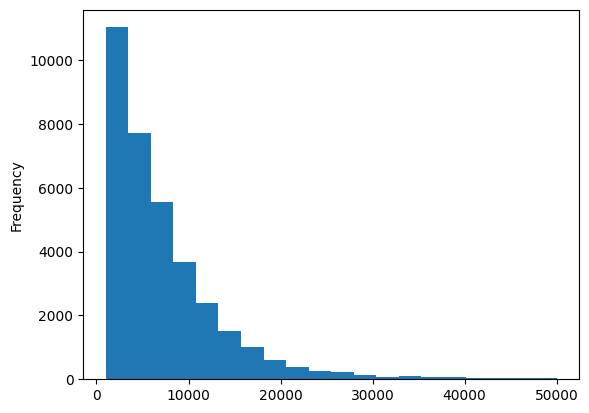

In [11]:
df['price_usd'].plot.hist(bins=20)

##### Podemos identificar que la media y la mediana son notablemente diferente, esto se explica ya que tenemos la gran mayoria de los autos entre los 0 y 10.000 USD, pero tambien tenemos algunos autos con precio muy altos.

Vamos a clasificar los datos por marca, para lograr identificar los autos que presentan valores atipicos

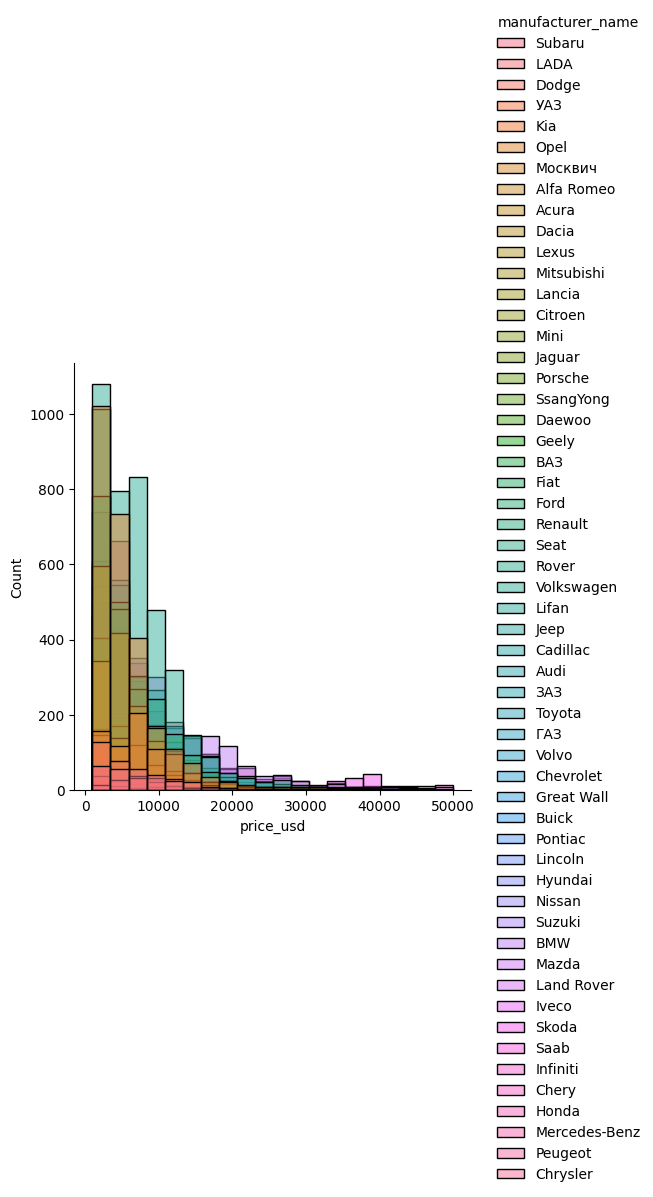

In [12]:
sns.displot(df, x= 'price_usd', hue='manufacturer_name', bins=20)

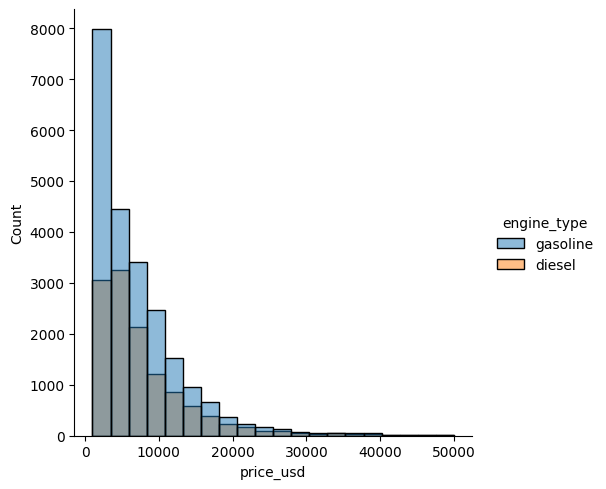

In [13]:
sns.displot(df, x= 'price_usd', hue='engine_type', bins=20)

In [14]:
df.groupby('engine_type').count()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_capacity,body_type,price_usd,up_counter
engine_type,,,,,,,,,,,
diesel,12320,12320,12320,12320,12320,12320,12320,12320,12320,12320,12320
gasoline,22649,22649,22649,22649,22649,22649,22649,22649,22649,22649,22649


* Se identifica que hay pocos autos electricos en oferta

##### A continuación se realiza un histograma, para analizar como están los precios de un modelo de auto especifíco con respecto al año de fabricación

<Axes: xlabel='price_usd', ylabel='Count'>

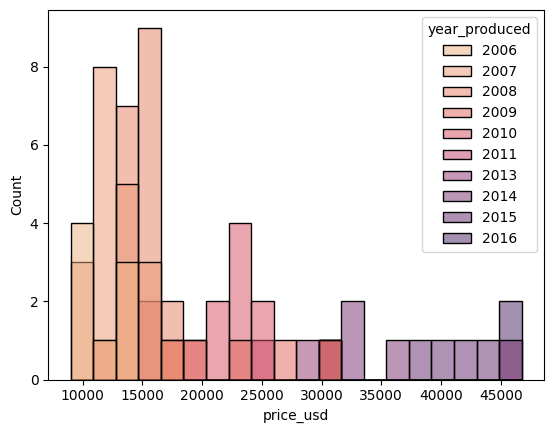

In [15]:
Q7_df = df[(df['manufacturer_name']=='Audi') & (df['model_name']=='Q7')]
sns.histplot(Q7_df, x='price_usd', hue = 'year_produced', palette='flare', bins=20)

* Se hace evidente que a medida que los autos son más antiguos, el valor del mismo es menor

#### Revisamos medidas de dispersión para el precio de los autos

In [16]:
desviacion= df['price_usd'].std()

rango = df['price_usd'].max() - df['price_usd'].min()

# Quartiles
median = df['price_usd'].median()
Q1 = df['price_usd'].quantile(q=0.25)
Q3 = df['price_usd'].quantile(q=0.75)
min_val = df['price_usd'].quantile(q=0)
max_val = df['price_usd'].quantile(q=1.0)

#print(min_val, Q1, median, Q3, max_val)

iqr = Q3 - Q1

minlimit = Q1 - 1.5*iqr
maxlimit = Q3 + 1.5*iqr

print('La desviacion estandar es: {}'.format(desviacion))
print('El rango es: {}'.format(rango))
print('La distribucion de los cuartiles es: {}, {}, {}, {}'.format(min_val, Q1, median, Q3, max_val))
print('El rango intercuartil es: {}'.format(iqr))
print('rango para detección de outliers: {}, {}'.format(minlimit, maxlimit))

La desviacion estandar es: 6433.450745443654
El rango es: 49000.0
La distribucion de los cuartiles es: 1000.0, 2800.0, 5400.0, 9500.0
El rango intercuartil es: 6700.0
rango para detección de outliers: -7250.0, 19550.0


* We notice that the distribution is skewed to the left, for the value of the range is aproximately 50.000, while the quartiles are between 1 and 8.990

#### We generate a graph allows us better visualizate the distribution

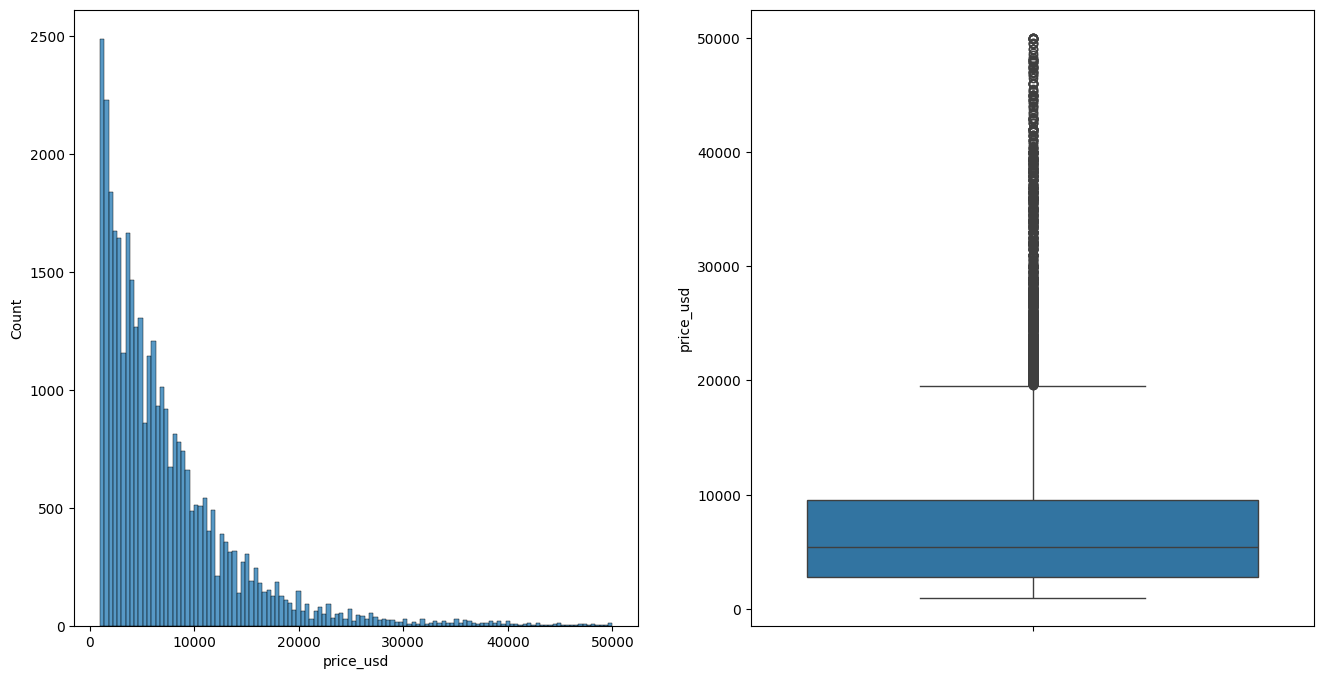

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
sns.histplot(df['price_usd'], ax=axes[0])
sns.boxplot(df['price_usd'], ax=axes[1])
plt.show()


C:\Users\Geyson\AppData\Local\Temp\ipykernel_4928\3304373522.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'engine_fuel', y = 'price_usd', data = df, palette='tab10')


<Axes: xlabel='engine_fuel', ylabel='price_usd'>

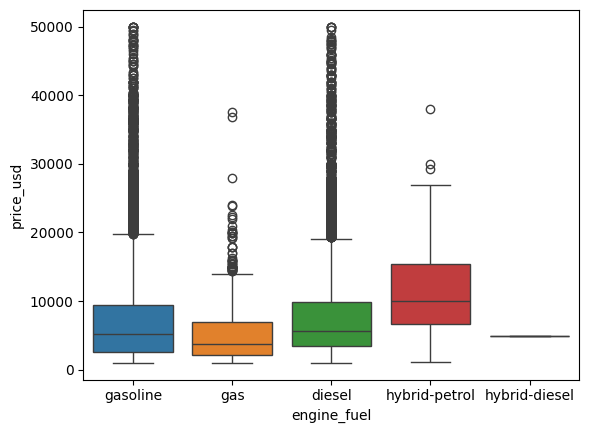

In [18]:
sns.boxplot(x = 'engine_fuel', y = 'price_usd', data = df, palette='tab10')


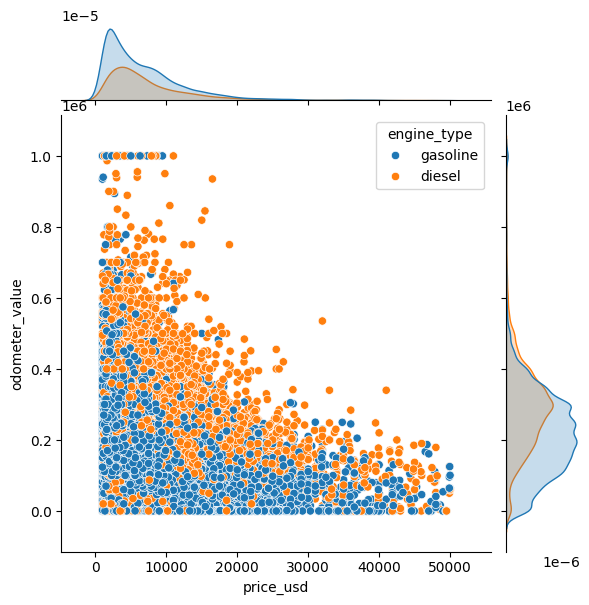

In [19]:
sns.jointplot(data=df, x='price_usd', y='odometer_value', hue='engine_type', palette='tab10')
plt.show()

* The picture, show us how while the values in 'odometer_value' increment, the values in 'price_usd' decrement 

C:\Users\Geyson\AppData\Local\Temp\ipykernel_4928\202436562.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( x= 'price_usd', y= 'manufacturer_name', data = df, palette='tab10', orient='h')


<Axes: xlabel='price_usd', ylabel='manufacturer_name'>

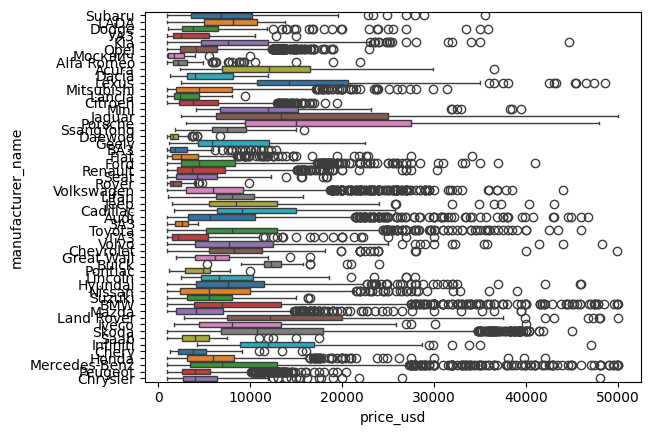

In [20]:
sns.boxplot( x= 'price_usd', y= 'manufacturer_name', data = df, palette='tab10', orient='h')

C:\Users\Geyson\AppData\Local\Temp\ipykernel_4928\376437444.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_usd', y= 'engine_fuel', data = df, palette='tab10', orient='h')


<Axes: xlabel='price_usd', ylabel='engine_fuel'>

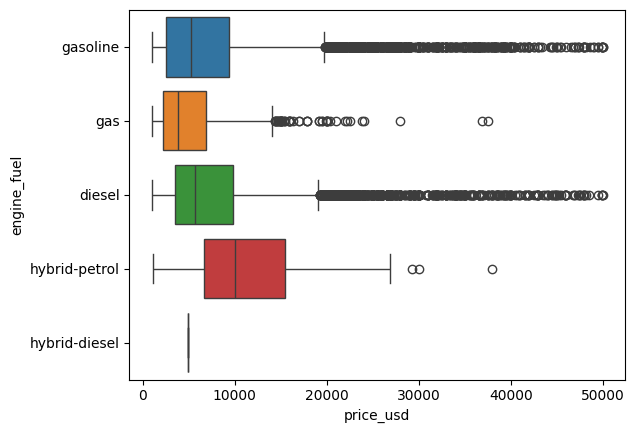

In [21]:
sns.boxplot(x='price_usd', y= 'engine_fuel', data = df, palette='tab10', orient='h')

* The electric cars are more expensive than other type of cars, followed by gasoline hybrids, the most economical are gasoline cars and diesel hybrids.

<Axes: xlabel='price_usd', ylabel='year_produced'>

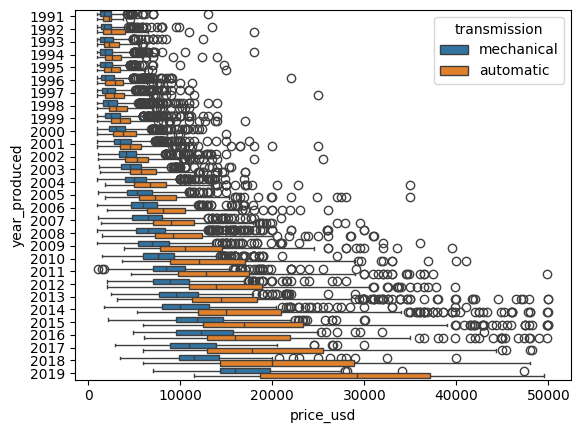

In [22]:
filtered_df = df[df['year_produced'] > 1990]
sns.boxplot(x='price_usd', y='year_produced', hue='transmission', data=filtered_df, palette='tab10', orient='h')


* The graph show us that the price of cars increment as year produced increases, also show us that automatic car are more expensive than mechanical ones regardless of year produced

C:\Users\Geyson\AppData\Local\Temp\ipykernel_4928\206369663.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_usd', y='manufacturer_name', data=filtered_df, palette='tab10', orient='h')


<Axes: xlabel='price_usd', ylabel='manufacturer_name'>

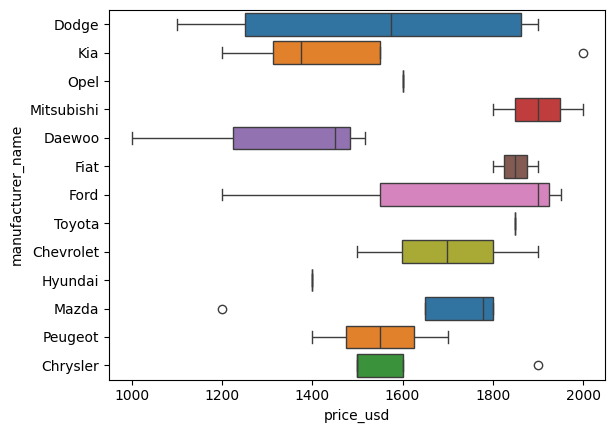

In [23]:
filtered_df = df[(df['price_usd'] > 100) & (df['price_usd'] < 2000) & (df['transmission'] == 'automatic') & (df['year_produced'] > 2000)]
sns.boxplot(x='price_usd', y='manufacturer_name', data=filtered_df, palette='tab10', orient='h')

In [24]:
filtered_df_dodge = filtered_df[(filtered_df['manufacturer_name'] == 'Dodge')]
filtered_df_dodge_sorted = filtered_df_dodge.sort_values(by='odometer_value', ascending=False)
filtered_df_dodge_sorted.head(10)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,price_usd,up_counter
646,Dodge,Stratus,automatic,other,307385,2004,gasoline,gasoline,2.4,sedan,1850.0,7
501,Dodge,Stratus,automatic,black,222222,2002,gasoline,gasoline,2.7,sedan,1900.0,4
491,Dodge,Stratus,automatic,green,138000,2003,gasoline,gasoline,2.4,sedan,1300.0,1
528,Dodge,Intrepid,automatic,red,123123,2002,gasoline,gasoline,2.7,sedan,1100.0,27


C:\Users\Geyson\AppData\Local\Temp\ipykernel_4928\2106260724.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price_usd', y='model_name', data=filtered_df_dodge_sorted.head(10), palette='tab10')


<Axes: xlabel='price_usd', ylabel='model_name'>

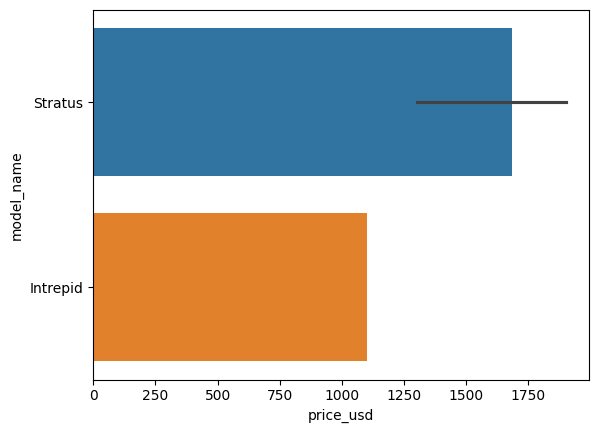

In [25]:
sns.barplot(x='price_usd', y='model_name', data=filtered_df_dodge_sorted.head(10), palette='tab10')

<Axes: xlabel='price_usd', ylabel='odometer_value'>

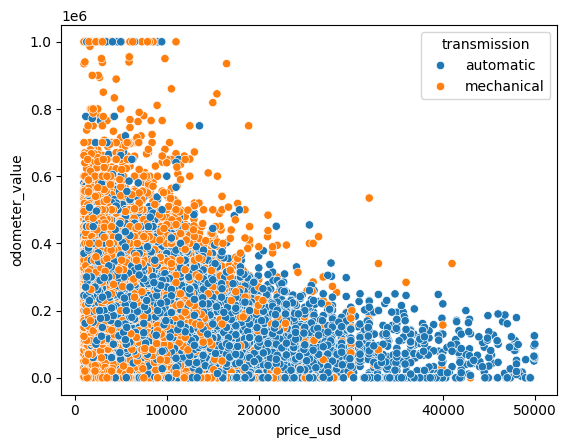

In [26]:
sns.scatterplot(data=df, x='price_usd', y='odometer_value', hue='transmission', palette='tab10')

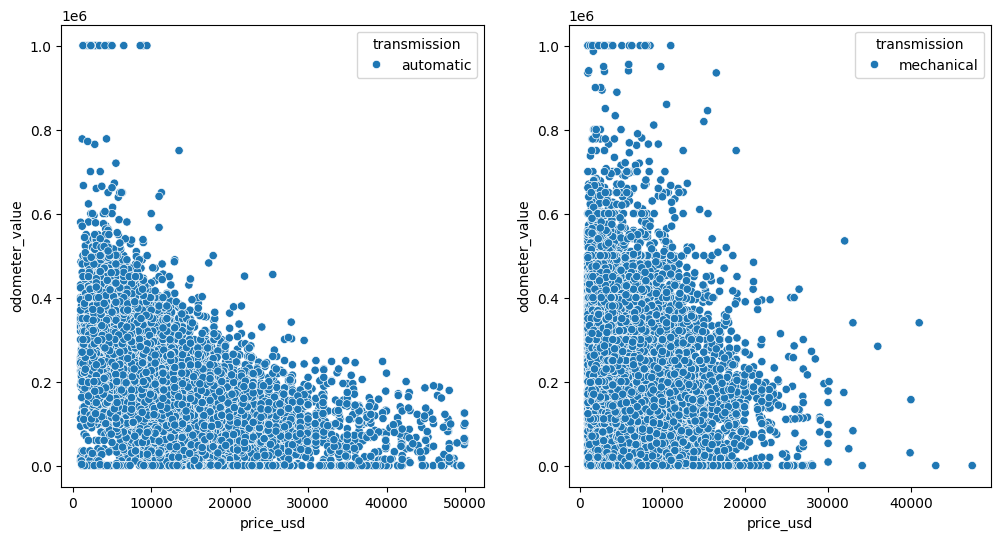

In [32]:
df_filtered_transmission_aut = df[(df['transmission'] == 'automatic')]
df_filtered_transmission_man = df[(df['transmission'] == 'mechanical')]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
#sns.histplot(df['price_usd'], ax=axes[0])
#sns.boxplot(df['price_usd'], ax=axes[1])

sns.scatterplot(data=df_filtered_transmission_aut, x='price_usd', y='odometer_value', hue='transmission', palette='tab10', ax=axes[0])
sns.scatterplot(data=df_filtered_transmission_man, x='price_usd', y='odometer_value', hue='transmission', palette='tab10', ax=axes[1])
plt.show()